In [1]:
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.backend import clear_session


from tensorflow.keras.models import Sequential, load_model


from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta

from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image

import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

%matplotlib inline 

In [2]:
(x_train10, y_train10), (x_test10, y_test10) = cifar10.load_data()
x_train10.shape, y_train10.shape, x_test10.shape, y_test10.shape

170508288/170498071 [==============================] - 3s 0us/step


((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']

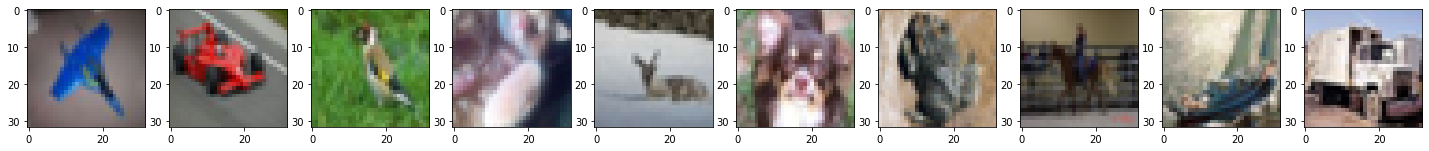

In [4]:
fig, axs = plt.subplots(1,10, figsize = (25,3))
for i in range(10):
  label_ind = np.where(y_train10 == i)[0]
  ind = np.random.choice(label_ind)
  img = x_train10[ind]
  axs[i].imshow(Image.fromarray(img));

In [5]:
y_train10 = utils.to_categorical(y_train10, 10)
y_test10 = utils.to_categorical(y_test10, 10)

Epoch 1/7
391/391 [==============================] - 33s 56ms/step - loss: 1.4703 - accuracy: 0.4623 - val_loss: 1.4406 - val_accuracy: 0.5101
Epoch 2/7
391/391 [==============================] - 21s 53ms/step - loss: 1.0231 - accuracy: 0.6460 - val_loss: 0.9113 - val_accuracy: 0.6839
Epoch 3/7
391/391 [==============================] - 21s 53ms/step - loss: 0.8553 - accuracy: 0.7069 - val_loss: 0.8600 - val_accuracy: 0.7202
Epoch 4/7
391/391 [==============================] - 21s 53ms/step - loss: 0.7529 - accuracy: 0.7443 - val_loss: 0.7303 - val_accuracy: 0.7550
Epoch 5/7
391/391 [==============================] - 21s 53ms/step - loss: 0.6810 - accuracy: 0.7715 - val_loss: 0.7209 - val_accuracy: 0.7586
Epoch 6/7
391/391 [==============================] - 21s 53ms/step - loss: 0.6213 - accuracy: 0.7905 - val_loss: 0.6401 - val_accuracy: 0.7887
Epoch 7/7
391/391 [==============================] - 21s 53ms/step - loss: 0.5741 - accuracy: 0.8069 - val_loss: 0.6541 - val_accuracy: 0.7861

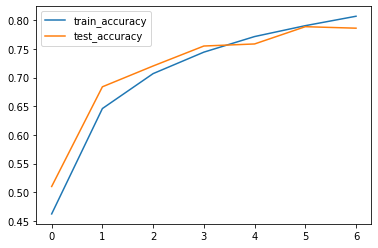

In [6]:
%%time

model = Sequential()
model.add(BatchNormalization(input_shape = (32,32,3)))
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(2048, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'])

result = model.fit(x_train10, y_train10, batch_size = 128, epochs = 7, validation_data = (x_test10, y_test10), verbose = 1)

plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

Epoch 1/7
782/782 [==============================] - 30s 37ms/step - loss: 0.7013 - accuracy: 0.7693 - val_loss: 0.7056 - val_accuracy: 0.7731
Epoch 2/7
782/782 [==============================] - 28s 36ms/step - loss: 0.6265 - accuracy: 0.7937 - val_loss: 0.6835 - val_accuracy: 0.7859
Epoch 3/7
782/782 [==============================] - 28s 36ms/step - loss: 0.5806 - accuracy: 0.8107 - val_loss: 0.6351 - val_accuracy: 0.8062
Epoch 4/7
782/782 [==============================] - 29s 38ms/step - loss: 0.5507 - accuracy: 0.8196 - val_loss: 0.6732 - val_accuracy: 0.8004
Epoch 5/7
782/782 [==============================] - 28s 36ms/step - loss: 0.5181 - accuracy: 0.8290 - val_loss: 0.6463 - val_accuracy: 0.8068
Epoch 6/7
782/782 [==============================] - 28s 36ms/step - loss: 0.4929 - accuracy: 0.8374 - val_loss: 0.6399 - val_accuracy: 0.8025
Epoch 7/7
782/782 [==============================] - 28s 36ms/step - loss: 0.4807 - accuracy: 0.8441 - val_loss: 0.5714 - val_accuracy: 0.8186

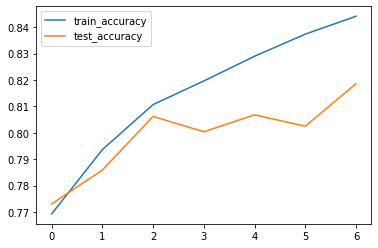

In [7]:
%%time

result = model.fit(x_train10, y_train10, batch_size = 64, epochs = 7, validation_data = (x_test10, y_test10), verbose = 1)
plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

Epoch 1/7
3125/3125 [==============================] - 78s 25ms/step - loss: 0.4356 - accuracy: 0.8545 - val_loss: 0.5053 - val_accuracy: 0.8432
Epoch 2/7
3125/3125 [==============================] - 78s 25ms/step - loss: 0.3938 - accuracy: 0.8685 - val_loss: 0.5012 - val_accuracy: 0.8472
Epoch 3/7
3125/3125 [==============================] - 76s 24ms/step - loss: 0.3776 - accuracy: 0.8732 - val_loss: 0.4955 - val_accuracy: 0.8497
Epoch 4/7
3125/3125 [==============================] - 77s 25ms/step - loss: 0.3698 - accuracy: 0.8754 - val_loss: 0.4928 - val_accuracy: 0.8504
Epoch 5/7
3125/3125 [==============================] - 76s 24ms/step - loss: 0.3582 - accuracy: 0.8783 - val_loss: 0.4907 - val_accuracy: 0.8539
Epoch 6/7
3125/3125 [==============================] - 78s 25ms/step - loss: 0.3527 - accuracy: 0.8804 - val_loss: 0.4872 - val_accuracy: 0.8544
Epoch 7/7
3125/3125 [==============================] - 76s 24ms/step - loss: 0.3441 - accuracy: 0.8835 - val_loss: 0.4871 - val_ac

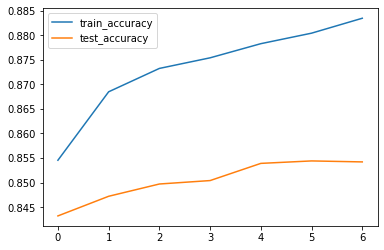

In [8]:
%%time

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.00001), metrics = ['accuracy'])
result = model.fit(x_train10, y_train10, batch_size = 16, epochs = 7, validation_data = (x_test10, y_test10), verbose = 1)
plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

Epoch 1/7
3125/3125 [==============================] - 78s 25ms/step - loss: 0.3419 - accuracy: 0.8840 - val_loss: 0.4893 - val_accuracy: 0.8565
Epoch 2/7
3125/3125 [==============================] - 77s 25ms/step - loss: 0.3371 - accuracy: 0.8865 - val_loss: 0.4884 - val_accuracy: 0.8567
Epoch 3/7
3125/3125 [==============================] - 77s 25ms/step - loss: 0.3295 - accuracy: 0.8892 - val_loss: 0.4842 - val_accuracy: 0.8570
Epoch 4/7
3125/3125 [==============================] - 75s 24ms/step - loss: 0.3296 - accuracy: 0.8880 - val_loss: 0.4844 - val_accuracy: 0.8574
Epoch 5/7
3125/3125 [==============================] - 76s 24ms/step - loss: 0.3264 - accuracy: 0.8903 - val_loss: 0.4875 - val_accuracy: 0.8589
Epoch 6/7
3125/3125 [==============================] - 77s 25ms/step - loss: 0.3159 - accuracy: 0.8908 - val_loss: 0.4874 - val_accuracy: 0.8609
Epoch 7/7
3125/3125 [==============================] - 76s 24ms/step - loss: 0.3159 - accuracy: 0.8921 - val_loss: 0.4869 - val_ac

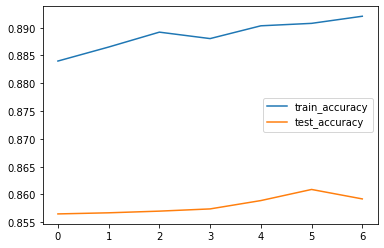

In [9]:
%%time

model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.00001), metrics = ['accuracy'])
result = model.fit(x_train10, y_train10, batch_size = 16, epochs = 7, validation_data = (x_test10, y_test10), verbose = 1)
plt.plot(result.history['accuracy'], label = 'train_accuracy')
plt.plot(result.history['val_accuracy'], label = 'test_accuracy')
plt.legend();

In [10]:
model.save('cifar_10.h5')

In [11]:
y_pred = model.predict(x_test10)

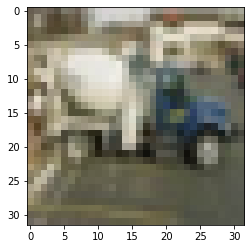

Распознала нейронка: грузовик, на самом деле: грузовик


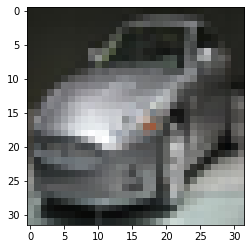

Распознала нейронка: автомобиль, на самом деле: автомобиль


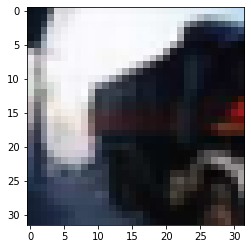

Распознала нейронка: кот, на самом деле: грузовик


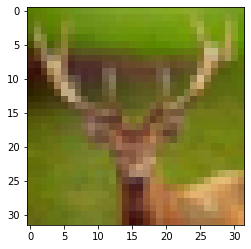

Распознала нейронка: олень, на самом деле: олень


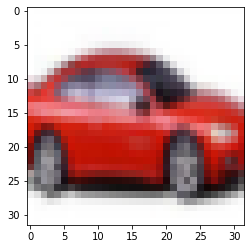

Распознала нейронка: автомобиль, на самом деле: автомобиль


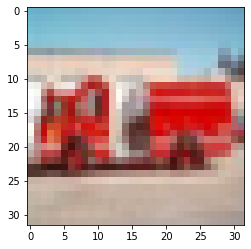

Распознала нейронка: грузовик, на самом деле: грузовик


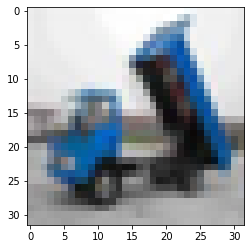

Распознала нейронка: грузовик, на самом деле: грузовик


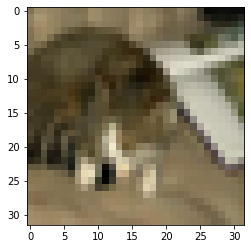

Распознала нейронка: кот, на самом деле: кот


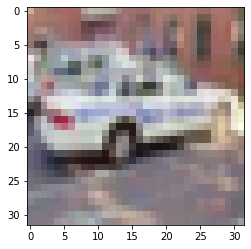

Распознала нейронка: автомобиль, на самом деле: автомобиль


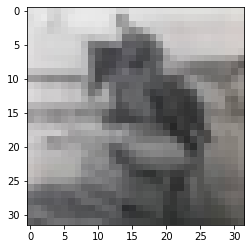

Распознала нейронка: лошадь, на самом деле: лошадь


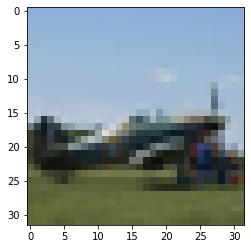

Распознала нейронка: самолет, на самом деле: самолет


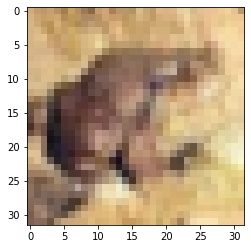

Распознала нейронка: лягушка, на самом деле: лягушка


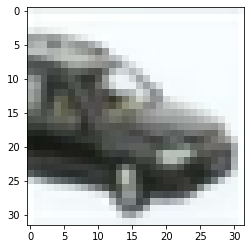

Распознала нейронка: автомобиль, на самом деле: автомобиль


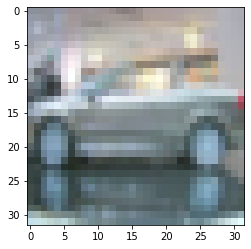

Распознала нейронка: автомобиль, на самом деле: автомобиль


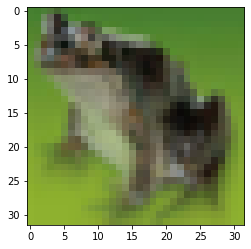

Распознала нейронка: лягушка, на самом деле: лягушка


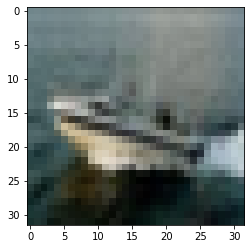

Распознала нейронка: корабль, на самом деле: корабль


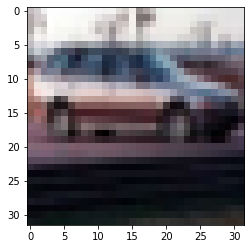

Распознала нейронка: автомобиль, на самом деле: автомобиль


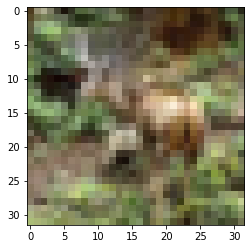

Распознала нейронка: олень, на самом деле: олень


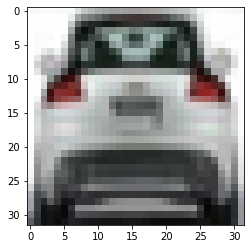

Распознала нейронка: автомобиль, на самом деле: автомобиль


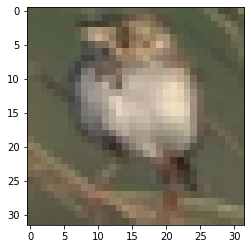

Распознала нейронка: птица, на самом деле: птица


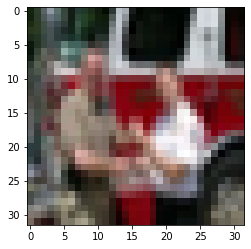

Распознала нейронка: кот, на самом деле: грузовик


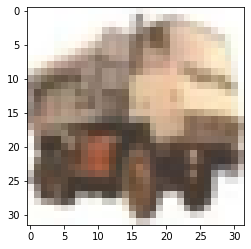

Распознала нейронка: грузовик, на самом деле: грузовик


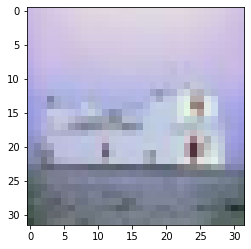

Распознала нейронка: корабль, на самом деле: корабль


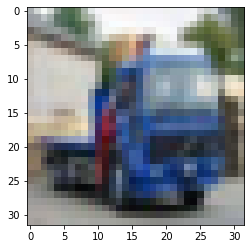

Распознала нейронка: грузовик, на самом деле: грузовик


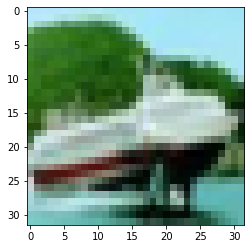

Распознала нейронка: корабль, на самом деле: корабль


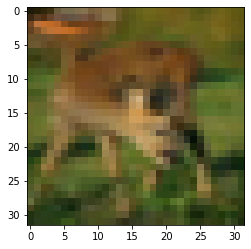

Распознала нейронка: олень, на самом деле: олень


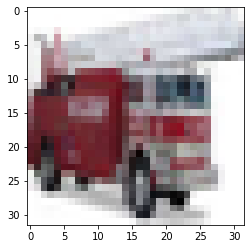

Распознала нейронка: грузовик, на самом деле: грузовик


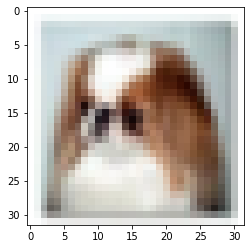

Распознала нейронка: собака, на самом деле: собака


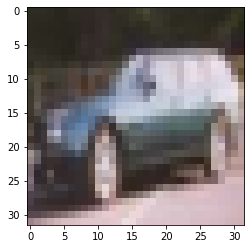

Распознала нейронка: автомобиль, на самом деле: автомобиль


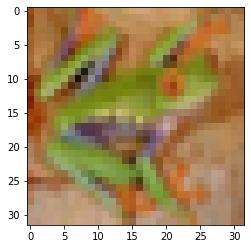

Распознала нейронка: лягушка, на самом деле: лягушка


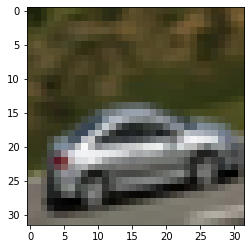

Распознала нейронка: автомобиль, на самом деле: автомобиль


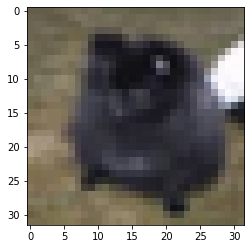

Распознала нейронка: собака, на самом деле: собака


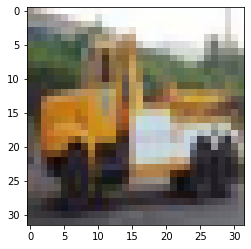

Распознала нейронка: грузовик, на самом деле: грузовик


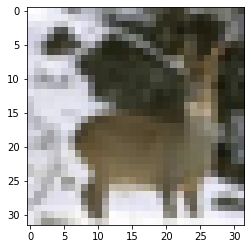

Распознала нейронка: кот, на самом деле: олень


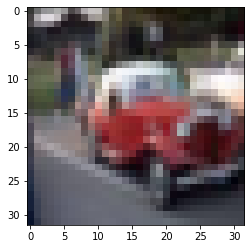

Распознала нейронка: грузовик, на самом деле: автомобиль


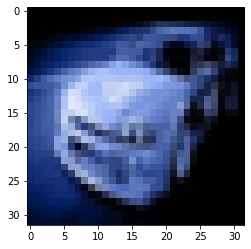

Распознала нейронка: автомобиль, на самом деле: автомобиль


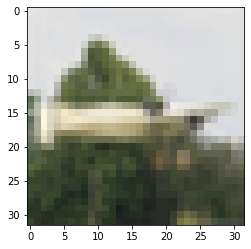

Распознала нейронка: самолет, на самом деле: самолет


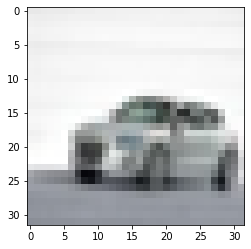

Распознала нейронка: автомобиль, на самом деле: автомобиль


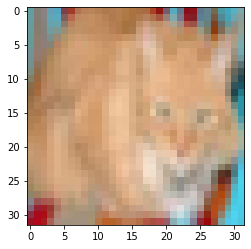

Распознала нейронка: кот, на самом деле: кот


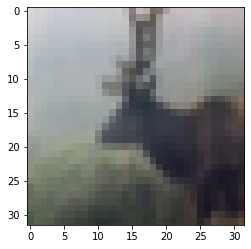

Распознала нейронка: олень, на самом деле: олень


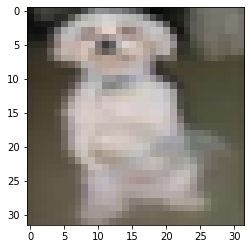

Распознала нейронка: собака, на самом деле: собака


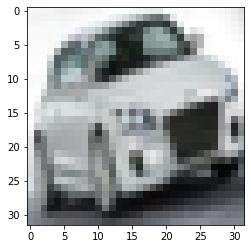

Распознала нейронка: автомобиль, на самом деле: автомобиль


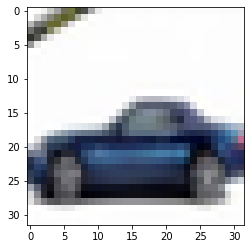

Распознала нейронка: автомобиль, на самом деле: автомобиль


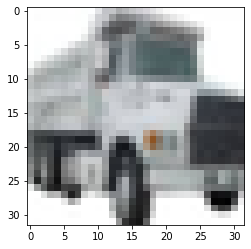

Распознала нейронка: грузовик, на самом деле: грузовик


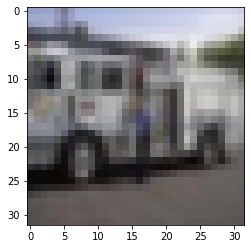

Распознала нейронка: грузовик, на самом деле: грузовик


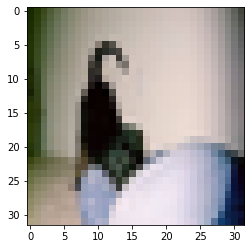

Распознала нейронка: птица, на самом деле: собака


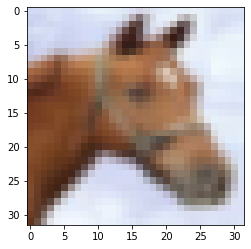

Распознала нейронка: лошадь, на самом деле: лошадь


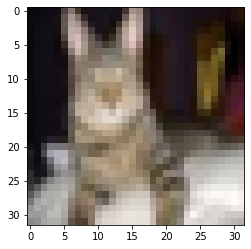

Распознала нейронка: кот, на самом деле: кот


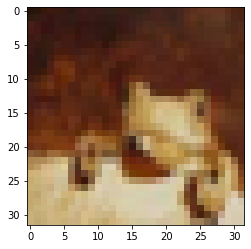

Распознала нейронка: лягушка, на самом деле: лягушка


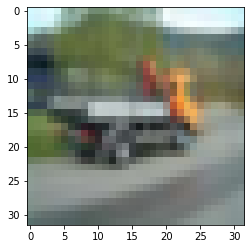

Распознала нейронка: автомобиль, на самом деле: грузовик


In [12]:
for i in range(50):
  n = np.random.randint(x_test10.shape[0])
  plt.imshow(Image.fromarray(x_test10[n]).convert('RGBA'))
  plt.show()
  print(f'Распознала нейронка: {classes[np.argmax(y_pred[n])]}, на самом деле: {classes[np.argmax(y_test10[n])]}')

In [13]:
!wget 'https://github.com/a18091986/MachineLearning/raw/main/Datasets/For%20CNN_cifar_10_test/real_images.zip' -O real_images.zip
!unzip 'real_images.zip' -d real_images


xTestReal = []
yTestReal = []

for i in range(10):
  for root, dirs, files in os.walk(f"real_images/{i}"):
    for file in files:
      img_path = f'real_images/{i}/{file}'
      xTestReal.append(np.asarray(image.load_img(img_path, grayscale = False, target_size = (32,32))))
      yTestReal.append(i)

xTestReal = np.array(xTestReal)
yTestReal = np.array(yTestReal)

xTestReal.shape, yTestReal.shape, yTestReal

--2022-05-02 23:51:24--  https://github.com/a18091986/MachineLearning/raw/main/Datasets/For%20CNN_cifar_10_test/real_images.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/a18091986/MachineLearning/main/Datasets/For%20CNN_cifar_10_test/real_images.zip [following]
--2022-05-02 23:51:25--  https://raw.githubusercontent.com/a18091986/MachineLearning/main/Datasets/For%20CNN_cifar_10_test/real_images.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3359898 (3.2M) [application/zip]
Saving to: ‘real_images.zip’

real_images.zip     100%[===================>]   3.20M  --.-KB/s    in 0.07s   

202

((20, 32, 32, 3),
 (20,),
 array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9]))

In [14]:
model = load_model('cifar_10.h5')

In [15]:
y_pred = model.predict(xTestReal)

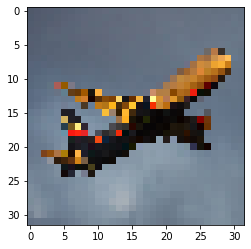

Распознала нейронка: самолет, на самом деле: самолет


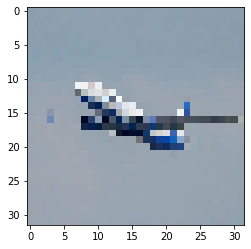

Распознала нейронка: самолет, на самом деле: самолет


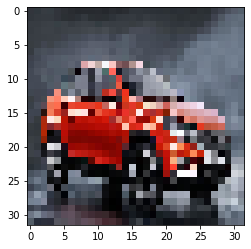

Распознала нейронка: автомобиль, на самом деле: автомобиль


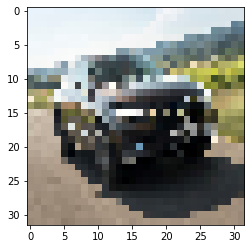

Распознала нейронка: грузовик, на самом деле: автомобиль


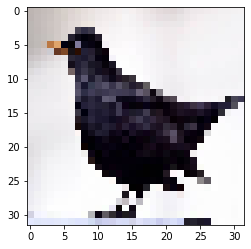

Распознала нейронка: птица, на самом деле: птица


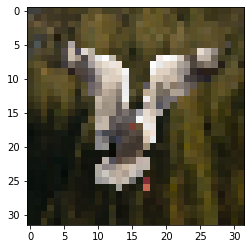

Распознала нейронка: лошадь, на самом деле: птица


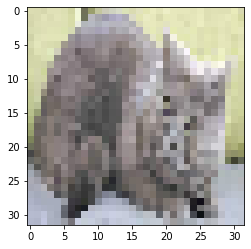

Распознала нейронка: лягушка, на самом деле: кот


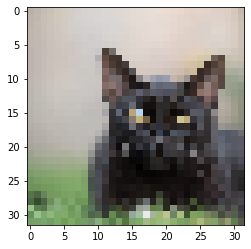

Распознала нейронка: кот, на самом деле: кот


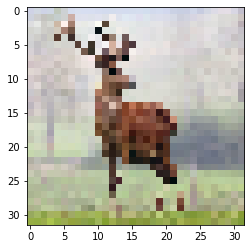

Распознала нейронка: лошадь, на самом деле: олень


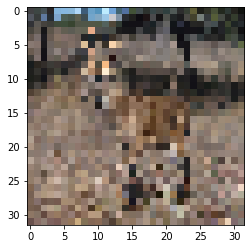

Распознала нейронка: лягушка, на самом деле: олень


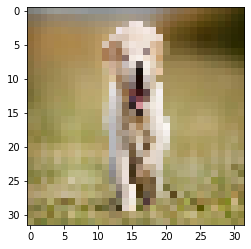

Распознала нейронка: собака, на самом деле: собака


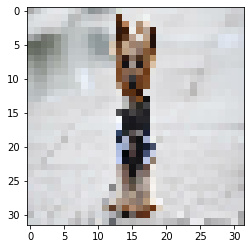

Распознала нейронка: собака, на самом деле: собака


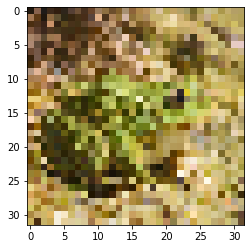

Распознала нейронка: лягушка, на самом деле: лягушка


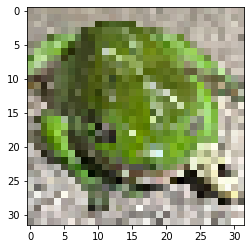

Распознала нейронка: лягушка, на самом деле: лягушка


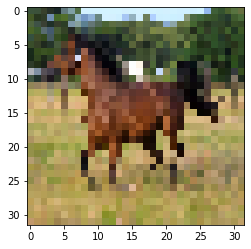

Распознала нейронка: лошадь, на самом деле: лошадь


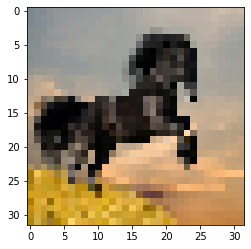

Распознала нейронка: лошадь, на самом деле: лошадь


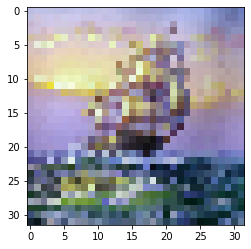

Распознала нейронка: корабль, на самом деле: корабль


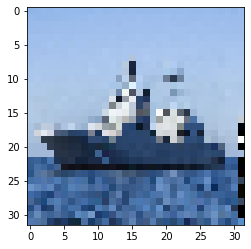

Распознала нейронка: корабль, на самом деле: корабль


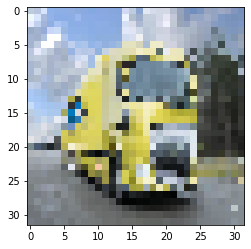

Распознала нейронка: грузовик, на самом деле: грузовик


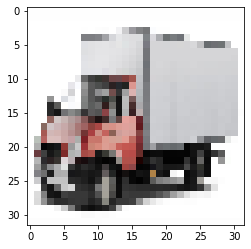

Распознала нейронка: грузовик, на самом деле: грузовик


In [16]:
count = 0
for i in range(20):
  plt.imshow(Image.fromarray(xTestReal[i]).convert('RGBA'))
  plt.show()
  print(f'Распознала нейронка: {classes[np.argmax(y_pred[i])]}, на самом деле: {classes[yTestReal[i]]}')
  if np.argmax(y_pred[i]) == yTestReal[i]:
    count +=1 


In [17]:
print(f'Accuracy: {count/20}')

Accuracy: 0.75
